This notebook demonstrates the implementation and application of a multiple linear regression model for the "housing" dataset. You can download the dataset from http://lib.stat.cmu.edu/datasets/.

**Comments:** "*The file cadata.txt contains all the the variables. Specifically, it contains median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in that order. The dependent variable is ln(median house value).*"

In [2]:
import numpy

# load data from text file (note that the initial comments have been deleted from the original file)
data = numpy.loadtxt("cadata.txt")

# the first column corresponds to the target variables; the remaining ones are the features
y, X = data[:,0], data[:,1:]

Next, we define a class for our linear regression model that implements the "fitting" phase (computation of the weights) and the "prediction" phase (computation of predictions for new data points).

In [3]:
class LinearRegression():
    """
    Linear regression implementation.
    """

    def __init__(self):
        
        pass
            
    def fit(self, X, y):
        """
        Fits the linear regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        y : Array of shape [n_samples, 1]
        """        

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))
        # IMPORTANT: Make sure that we have a column vector! 
        y = numpy.array(y).reshape((len(y), 1))

        
        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        # augmented data matrix!
        X = numpy.concatenate((ones, X), axis=1)

        # compute weights
        XTX = numpy.dot(X.T, X)
        XTy = numpy.dot(X.T, y)
        
        # Option 1
        # matrix multiplication in numpy: numpy.dot(X.T, X) 
        XTXinv = numpy.linalg.inv(XTX)
        self._w = numpy.dot(XTXinv, XTy)
        
        # Option 2
        #self._w = numpy.linalg.solve(XTX, XTy)
                
        # Option 3
        #XTXpinv = numpy.linalg.pinv(XTX)
        #self._w = numpy.dot(XTXpinv, XTy)
        
        # Option 4 
        # ...
                
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of shape [n_samples, 1]
        """                     

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)           

        # compute predictions
        predictions = numpy.dot(X, self._w)

        return predictions

We first instantiate the "model" object. Afterwards, we call the "fit" method to fit our model (i.e., to compute the weights).

In [4]:
model = LinearRegression()
model.fit(X, y)

Given the fitted model, we can now obtain predictions for new data points. For simplification, we just use our data points again here.

In [5]:
preds = model.predict(X)

Finally, we have a look at the quality of our model by computing the RMSE and by generating a plot "predictions" vs. "true labels".

RMSE: 69513.46032933137


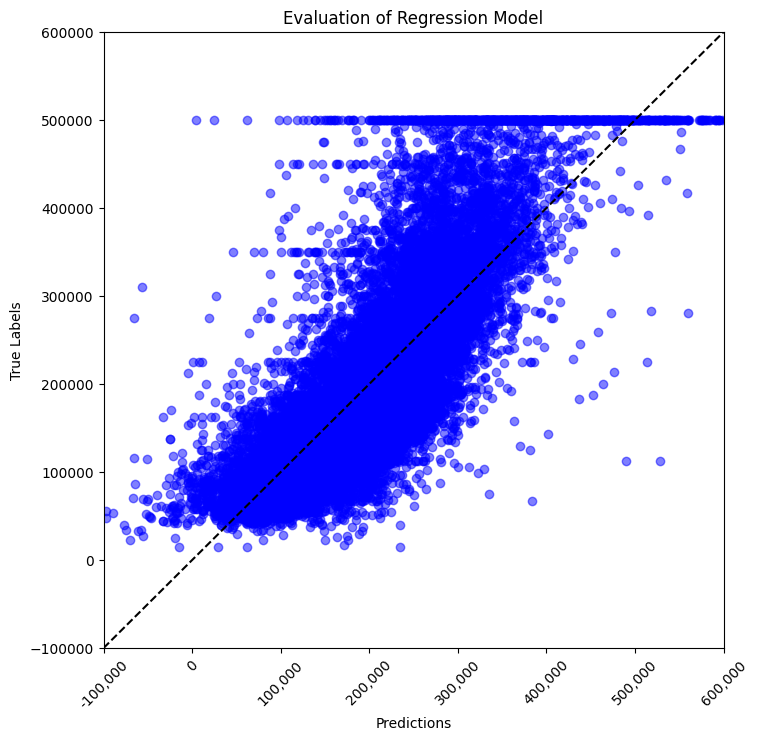

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import mean_squared_error

# compute RMSE
print("RMSE: {}".format(numpy.sqrt(mean_squared_error(y, preds))))

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(preds, y, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-100000,600000], [-100000, 600000], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-100000,600000])
plt.ylim([-100000,600000])
plt.title("Evaluation of Regression Model")
plt.show()

## Too much features

Let's try out, what happens, if we have more features than observations:

In [95]:
n_samples = 3
n_features = 6

In [98]:
X_new = numpy.random.rand(n_samples, n_features) ## Shape [n_samples, n_features]
true_w = numpy.random.rand(n_features,1) ## Shape [n_features, 1]
y_new = numpy.matmul(X_new, true_w) ## Shape [n_samples, 1]

In [99]:
model_new = LinearRegression()
model_new.fit(X_new, y_new)

LinAlgError: Singular matrix

If there are less samples than features, then either 
- the inversion of the matrix XTX throws an error or 
- the result of numpy.linalg.inv(XTX) is not inverse to XTX 

This is due to the fact that the matrix XTX is not invertible and hence the algorithm struggles. 